# F0753 範例程式 - 第 10 章 爬取網路資料：使用 requests

## 10-0 用 requests 存取網路資源

### *request 是在做什麼？*

In [ ]:
import requests
import pandas as pd

headers = {'Upgrade-Insecure-Requests':'1','user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}
response = requests.get('http://stats.moe.gov.tw/files/detail/108/108_student.csv', headers=headers)

#print(response.text)

#Pandas 也可以直接讀網址
# Read the CSV file
#student_data = pd.read_csv('http://stats.moe.gov.tw/files/detail/108/108_student.csv')

student_data=pd.dataframe(response)
#student_data = pd.read_csv('http://stats.moe.gov.tw/files/detail/108/108_student.csv', headers=headers)

# View the first 5 rows
student_data.head()


KeyboardInterrupt: 

In [ ]:
response = requests.get('https://www.ntou.edu.tw/')

print(response.text)


<!DOCTYPE html>
<html dir="ltr" lang="zh-TW">
<head>
    <title>國立臺灣海洋大學</title>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="format-detection" content="telephone=no">
    <meta name="Accessible_website" content= "本網站通過AA檢測等級無障礙網頁檢測">
    <meta name="copyright" content="本網頁著作權屬於國立臺灣海洋大學所有© copyright 2019 NTOU-National Taiwan Ocean University All Rights Reserved">
    
    <!-- ==== Document Meta ==== -->
    <meta name="author" content="">
    <meta name="keywords" content="NTOU,National Taiwan Ocean University,國立臺灣海洋大學,海大,海洋,Maritime Science and Management, Life Sciences, Engineering, Electrical Engineering and Computer Science" />
    <meta name="description" content="NTOU-National Taiwan Ocean University-國立臺灣海洋大學全球資訊網,在整體發展的規劃下，海大除繼續發展海運暨管理、生命科學、工程以及海洋科學與資源領域外，亦將強化電資高科技與人文社會科學之發展" />

    <!-- ==== Favicons ==== -->
    <link rel="icon" href="/NTO

{"attractions": [{"id": "5821017", "title": "\u57fa\u9686\u6d77\u6d0b\u5ee3\u5834", "cover_image": "https://tour.klcg.gov.tw/media/klcgtour/attractions/5821017/55f1314c-bc36-4691-aff6-abe5408e424d.jpg", "address": "\u57fa\u9686\u5e02\u4ec1\u611b\u5340\u5fe0\u4e00\u8def", "created_at": "2020-07-03T08:32:58.221366+00:00", "updated_at": "2022-05-02T07:52:17.515056+00:00", "visit_hours": "\u958b\u653e\u5f0f\u7a7a\u9593\uff0c\u7121\u6642\u9593\u9650\u5236\u3002", "ticket_price": "\u7121\u9580\u7968", "traffic_guideline": "1. \u57fa\u9686\u706b\u8eca\u7ad9\u4e0b\u8eca\u904e\u5929\u6a4b\u5373\u9054\uff0c\u6216\u642d\u4e58\u570b\u5149\u5ba2\u904b\u65bc\u57fa\u9686\u7ad9\uff08\u6d77\u6d0b\u5ee3\u5834\u524d\uff09\u4e0b\u8eca\uff0c\u6b65\u884c\u5373\u53ef\u62b5\u9054\u3002", "parking_information": "\u57fa\u9686\u6771\u5cb8\u5730\u4e0b\u505c\u8eca\u5834\uff1b\u53e6\u5c0f\u8247\u78bc\u982d\u505c\u8eca\u5834\u53ef\u505c\u5c0f\u5ba2\u8eca"}, {"id": "5962994", "title": "\u57fa\u9686\u5dbc", "cover_ima

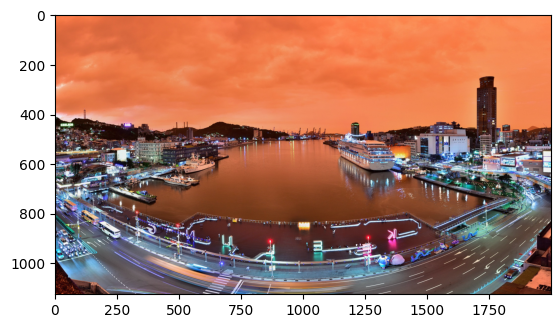

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#response = requests.get('http://gis.taiwan.net.tw/XMLReleaseALL_public/activity_C_f.json')
response = requests.get('https://tour.klcg.gov.tw/data/attractions.json')
print(response.text)
print(response.json())

#response.encoding = 'big5'
response.encoding = 'utf-8'
print(response.json())



#如何從json中取值
pic_url=response.json()['attractions'][0]['cover_image']
print(pic_url)

# 如何顯示抓到的照片
resp = requests.get(pic_url, stream=True).raw
pic = np.asarray(bytearray(resp.read()), dtype="uint8")
pic = cv2.imdecode(pic, cv2.IMREAD_COLOR)

plt.imshow(pic)
#plt.savefig('pic.jpg')



# 如何儲存抓到的照片
with open('pic.png', 'wb') as f:
    f.write(requests.get(pic_url).content)


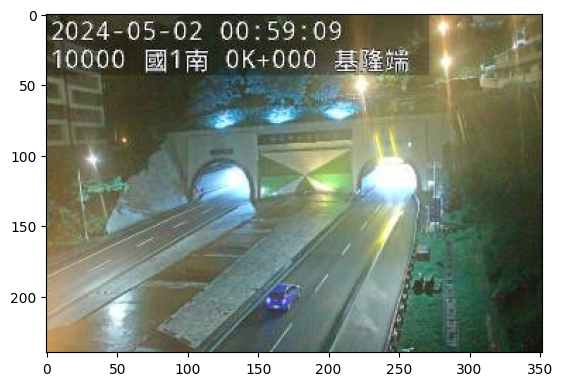

KeyboardInterrupt: 

In [ ]:
# 應用: 即時路況影像

from IPython.display import clear_output
import matplotlib.pyplot as plt
from numpy.random import randn
from time import sleep

cam_url='https://cctvn.freeway.gov.tw/abs2mjpg/jpg?camera=10000'
# 好孩子不要學: http://insecam.org/

for i in range(20):
  resp = requests.get(cam_url, stream=True).raw
  pic = np.asarray(bytearray(resp.read()), dtype="uint8")
  pic = cv2.imdecode(pic, cv2.IMREAD_COLOR)

  clear_output()
  plt.imshow(pic)
  plt.show()
  sleep(3)





## 10-1 以 requests 取得網路服務

### *簡單的網路服務範例*

In [ ]:
import requests
url = 'https://random.dog/woof.json'

response = requests.get(url)
print(response.text)

{"fileSizeBytes":215069,"url":"https://random.dog/ad5792e8-2477-41d7-8575-da6b25718d23.jpg"}


### *解讀 JSON 格式資料*

In [ ]:
response.json()

{'fileSizeBytes': 215069,
 'url': 'https://random.dog/ad5792e8-2477-41d7-8575-da6b25718d23.jpg'}

In [ ]:
type(response.json())

dict

In [ ]:
data = response.json()

print(data['fileSizeBytes'])
print(data['url'])

215069
https://random.dog/ad5792e8-2477-41d7-8575-da6b25718d23.jpg


In [ ]:
import webbrowser

webbrowser.open(data['url'])

#colab改用這個:
from IPython.display import Javascript
display(Javascript('window.open("{url}");'.format(url=data['url'])))

<IPython.core.display.Javascript object>

## 10-2 解析網路服務的資料內容

### *從回應的 JSON 文字取出所需資料*

Foreign exchange rates API 網站：https://exchangeratesapi.io/

In [ ]:
import requests, pprint

#url = 'https://api.exchangeratesapi.io/latest'
#https://github.com/fawazahmed0/currency-api
url = "https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/twd.json"

response = requests.get(url)
data = response.json()
#pprint.pprint(data)
print(data['twd']['eur'])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
#網頁不同，抓回來的就不一樣
#data['rates']

#
url='https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/twd/jpy.json'
response = requests.get(url)
data = response.json()
print(data)


from datetime import datetime, timedelta
days=70
dates=[]
rates=[]
for i in range(days,0,-1):
  s = datetime.strftime(datetime.now()-timedelta(days=i),'%Y-%m-%d')
  url='https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/'+s+'/currencies/jpy/twd.json'
  response = requests.get(url)
  data = response.json()
  dates.append(s)
  rates.append(data['twd'])



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

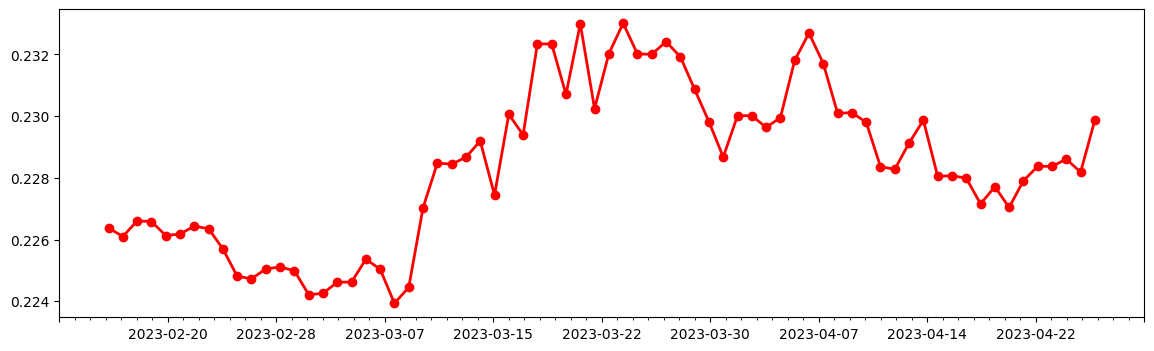

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(14,4))
ax = plt.axes()
plt.plot(dates,rates,color='r', marker='o', linewidth=2, markersize=6)
ax.xaxis.set_major_locator(ticker.LinearLocator(11))
ax.xaxis.set_minor_locator(ticker.LinearLocator(71))

#ax.set_xticklabels(labels=dates,color='#f22',fontsize=15,rotation=285)
plt.show()

In [ ]:
#data['rates']['IDR']

45


KeyError: ignored

### *在程式重複查詢服務並取回資料*

World Time API 網站: http://worldtimeapi.org/

In [ ]:
import requests, pprint

url = 'http://worldtimeapi.org/api/ip'

data = requests.get(url).json()
#pprint.pprint(data)
print(data['day_of_year'])

122


In [ ]:
# 此程式不會停止, 執行後按停止鈕來中止它

import requests, time

url = 'http://worldtimeapi.org/api/ip'

while True:
    data = requests.get(url).json()
    print(data['datetime'])
    time.sleep(10)

2024-05-01T13:07:45.399431-04:00
2024-05-01T13:07:55.458108-04:00
2024-05-01T13:08:05.526592-04:00
2024-05-01T13:08:15.663228-04:00


KeyboardInterrupt: 

### *確保網路服務有正確回應*

In [ ]:
# 沿用上一小節的模組及 url

response = requests.get(url)

if response.status_code == requests.codes.ok:
    data = response.json()
    print(data['datetime'])
else:
    print('網路服務查詢失敗')

2024-05-01T13:08:47.813422-04:00


### *在查詢服務時使用參數*

Sunset and sunrise times API 網站：https://sunrise-sunset.org/api

In [ ]:
import requests, pprint

url = 'https://api.sunrise-sunset.org/json?lat=22.753773&lng=121.166549'
data = requests.get(url).json()
pprint.pprint(data)

{'results': {'astronomical_twilight_begin': '8:02:31 PM',
             'astronomical_twilight_end': '11:42:18 AM',
             'civil_twilight_begin': '8:58:52 PM',
             'civil_twilight_end': '10:45:57 AM',
             'day_length': '13:02:21',
             'nautical_twilight_begin': '8:31:01 PM',
             'nautical_twilight_end': '11:13:48 AM',
             'solar_noon': '3:52:25 AM',
             'sunrise': '9:21:14 PM',
             'sunset': '10:23:35 AM'},
 'status': 'OK',
 'tzid': 'UTC'}


In [ ]:
i=5
t=f'xxx{i}yyy'
print(t)

xxx5yyy


In [ ]:
latitude = 24.912091528538237
longitude = 121.62582439010139


url = f'https://api.sunrise-sunset.org/json?lat={latitude}&lng={longitude}'
data = requests.get(url).json()
pprint.pprint(data)

{'results': {'astronomical_twilight_begin': '7:56:00 PM',
             'astronomical_twilight_end': '11:45:09 AM',
             'civil_twilight_begin': '8:53:40 PM',
             'civil_twilight_end': '10:47:29 AM',
             'day_length': '13:08:11',
             'nautical_twilight_begin': '8:25:13 PM',
             'nautical_twilight_end': '11:15:55 AM',
             'solar_noon': '3:50:34 AM',
             'sunrise': '9:16:29 PM',
             'sunset': '10:24:40 AM'},
 'status': 'OK',
 'tzid': 'UTC'}


## 10-3 網路服務實用範例：中央氣象局 36 小時天氣預報

資料擷取 API 線上說明文件：https://opendata.cwb.gov.tw/dist/opendata-swagger.html  

**中央氣象局 改制 中央氣象署  cwb 變成 cwa**

### *了解服務傳回的 JSON 資料之結構*

In [ ]:
import requests, pprint

url = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/F-C0032-001?Authorization=rdec-key-123-45678-011121314&locationName=連江縣'

data = requests.get(url).json()
pprint.pprint(data)

{'records': {'datasetDescription': '三十六小時天氣預報',
             'location': [{'locationName': '連江縣',
                           'weatherElement': [{'elementName': 'Wx',
                                               'time': [{'endTime': '2024-05-02 '
                                                                    '06:00:00',
                                                         'parameter': {'parameterName': '陰短暫陣雨或雷雨',
                                                                       'parameterValue': '18'},
                                                         'startTime': '2024-05-02 '
                                                                      '00:00:00'},
                                                        {'endTime': '2024-05-02 '
                                                                    '18:00:00',
                                                         'parameter': {'parameterName': '陰時多雲',
                                                   

In [ ]:
data['records']['location'][0]['weatherElement'][1]['time']

[{'startTime': '2024-05-02 00:00:00',
  'endTime': '2024-05-02 06:00:00',
  'parameter': {'parameterName': '40', 'parameterUnit': '百分比'}},
 {'startTime': '2024-05-02 06:00:00',
  'endTime': '2024-05-02 18:00:00',
  'parameter': {'parameterName': '20', 'parameterUnit': '百分比'}},
 {'startTime': '2024-05-02 18:00:00',
  'endTime': '2024-05-03 06:00:00',
  'parameter': {'parameterName': '20', 'parameterUnit': '百分比'}}]

### *走訪資料*

In [ ]:
# 沿用上一小節的模組及 data

pop = data['records']['location'][0]['weatherElement'][1]['time']

for p in pop:
    print('預報區間', p['startTime'], '~', p['endTime'])
    print('降雨機率:', p['parameter']['parameterName'] + '%')
    print()

預報區間 2024-05-02 00:00:00 ~ 2024-05-02 06:00:00
降雨機率: 40%

預報區間 2024-05-02 06:00:00 ~ 2024-05-02 18:00:00
降雨機率: 20%

預報區間 2024-05-02 18:00:00 ~ 2024-05-03 06:00:00
降雨機率: 20%



## 10-4 網路資料圖形化：以地震震度統計為例

GeoJSON API 網站：https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

### *取出地震震度*

In [ ]:
import requests, pprint

url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson'

data = requests.get(url).json()
pprint.pprint(data)

Streaming output truncated to the last 5000 lines.
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1714317872040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr71447008'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-176.5972, -21.8501, 168.178],
                            'type': 'Point'},
               'id': 'us6000mumi',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '6000mumi',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000mumi.geojson',
                              'dmin': 1.464,
                              'felt': None,
                              'gap': 61,
                              'ids': ',us6000mumi,',
    

In [ ]:
quakes = data['features']
mag = quakes[0]['properties']['mag']

print(mag)

2.69


### *統計各種地震規模的數量*

In [ ]:
# 沿用上一小節的模組及 data

quakes = data['features']
mag_label = ['未滿3級', '3~4級', '4~5級', '5~6級', '6級以上']
mag_list = [0, 0, 0, 0, 0]

for q in quakes:
    mag = q['properties']['mag']
    if mag >= 6:
        mag_list[4] += 1
    elif mag >= 5:
        mag_list[3] += 1
    elif mag >= 4:
        mag_list[2] += 1
    elif mag >= 3:
        mag_list[1] += 1
    else:
        mag_list[0] += 1

print(mag_list)

[100, 50, 111, 24, 3]


### *繪製長條圖與圓餅圖*

--2024-05-01 17:10:20--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.217.138, 173.194.217.102, 173.194.217.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-01 17:10:20--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.213.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  90.4MB/s    in 0.2s    

2024-05-01 

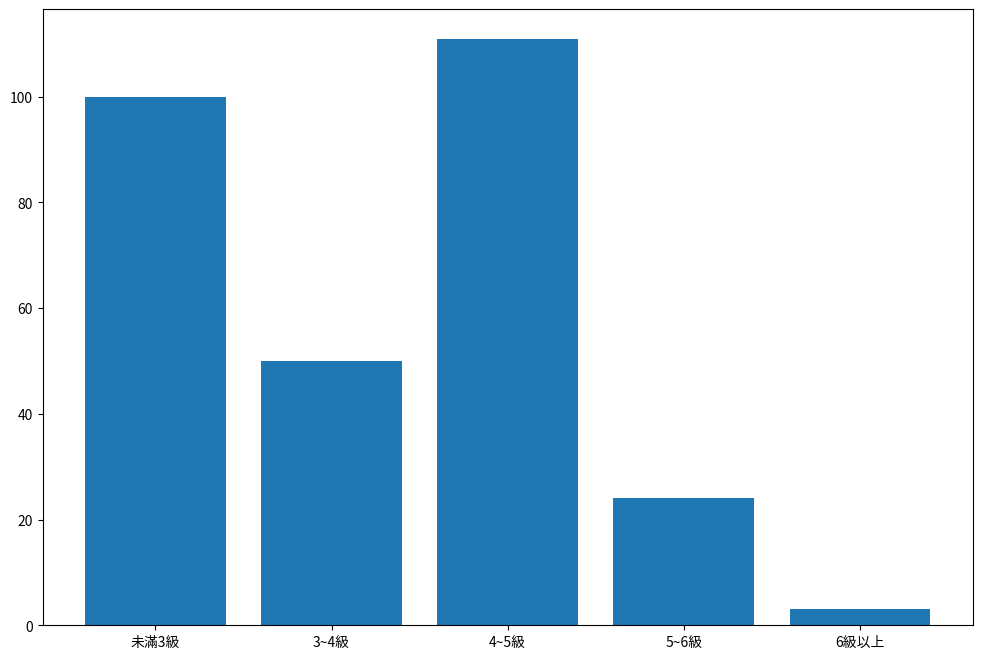

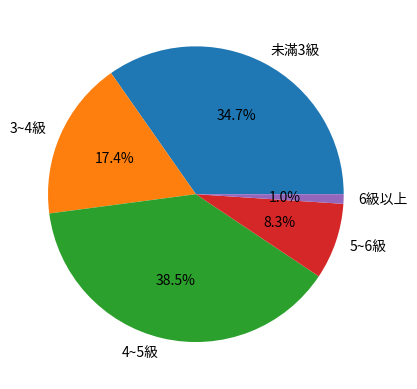

In [ ]:
# 沿用上一小節的模組及 mag_label/mag_list

import matplotlib.pyplot as plt
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib.font_manager as fm
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')

plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

plt.bar(mag_label, mag_list)
plt.show()

plt.pie(mag_list, labels=mag_label, autopct='%1.1f%%')
plt.show()

## (bonus) 查詢全球新冠肺炎疫情

In [ ]:
import requests, pprint

url = 'https://coronavirus-19-api.herokuapp.com/countries'
data = requests.get(url).json()

for record in data:
    print(f"[{record['country']:25s}] {record['cases']:10d} 例 (今日新增 {record['todayCases']} 例)")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
headers = {'Upgrade-Insecure-Requests':'1','user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}

url ='https://tdx.transportdata.tw/api/basic/v2/Bus/RealTimeByFrequency/Streaming/InterCity/1579?%24top=30&%24format=JSON'
#data = requests.get(url, headers=headers).json()
#for record in data:
#  print(record)


import pandas as pd

url ='https://e-traffic.klcg.gov.tw/KeelungTraffic/pages/park.jsp/'
data = requests.get(url, headers=headers)
table=pd.read_html(data.text)[0]
table.head()


,停車場名稱,剩餘停車格,更新時間
0,基隆東岸停車場,495,2024-05-02 01:33
1,信二停車場,396,2024-05-02 01:34
2,博愛國宅地下室停車場,92,2024-05-02 01:33
3,信義國小地下停車場,181,2024-05-02 01:34
4,基隆信義停車場,36,2024-05-02 01:33
